# Irreducible Mass of Black Holes

## Work in progress!!!

For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 

\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\end{equation}

For convenience, let us define 
$f= M_{\rm irr}/M$

\begin{equation}
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

\begin{equation}
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,.
\end{equation}

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity

In [32]:
f = lambda  spin: (0.5 * (1 + (1 - spin**2)**0.5))**0.5;

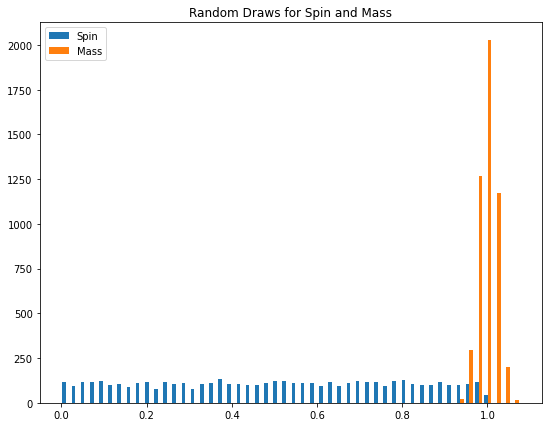

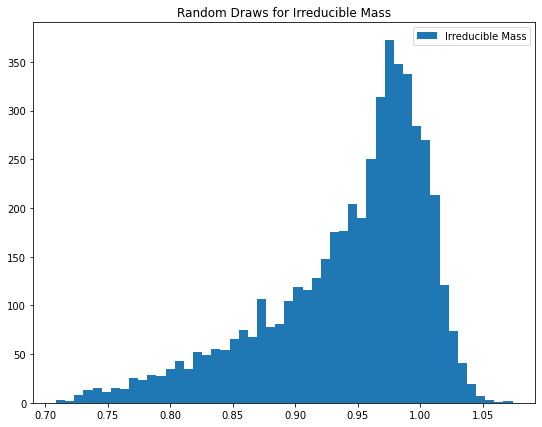

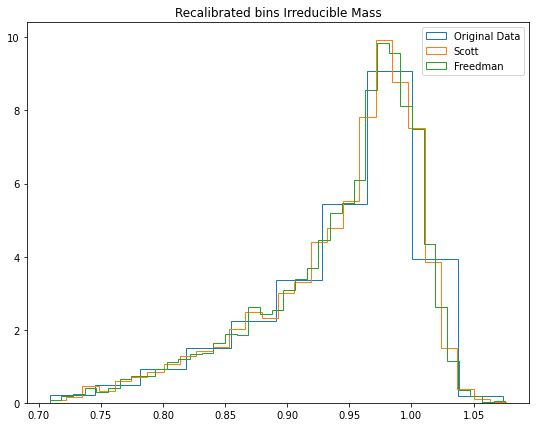

In [61]:
#.1 & .2 Generating random samples for irreducible mass and performing basic analysis with rule-of-thumb histograms

N = 5000
mu = 1
sigma = 0.02
bins = 50

spin = np.random.uniform(0, 1, N)
mass = stats.norm(mu, sigma).rvs(N)

fig = plt.subplots(figsize=(9, 7))
plt.title('Random Draws for Spin and Mass')
plt.hist([spin, mass], bins=bins, label=['Spin', 'Mass'])
plt.legend()
plt.show()

m_irr = mass * f(spin)

fig = plt.subplots(figsize=(9, 7))
plt.title('Random Draws for Irreducible Mass')
plt.hist(m_irr, bins=bins, label='Irreducible Mass')
plt.legend()
plt.show()

#Implemented rule of thumb binning
fig = plt.subplots(figsize=(9, 7))
plt.title('Recalibrated bins Irreducible Mass')
_ = fancyhist(m_irr, histtype="step", density=True, label='Original Data')
_ = fancyhist(m_irr, bins="scott", histtype="step",density=True, label='Scott')
_ = fancyhist(m_irr, bins="freedman", histtype="step",density=True, label='Freedman')
plt.legend()
plt.show()


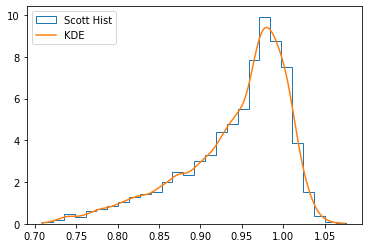

In [71]:
#.3 KDE for M_irr

def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde = KernelDensity(bandwidth=bandwidth, kernel=kernel)
    kde.fit(data[:, np.newaxis])
    log_pdf = kde.score_samples(xgrid[:, np.newaxis])
    
    #Result of fit is a log pdf
    pdf = np.exp(log_pdf)
    return pdf

xgrid = np.linspace(m_irr.min(), m_irr.max(), 1000)


bandwidth = 0.008

KDE = kde_sklearn(m_irr, bandwidth, kernel='gaussian')
_ = fancyhist(m_irr, bins="scott", histtype="step", density=True, label='Scott Hist')
plt.plot(xgrid, KDE, label='KDE')
plt.legend()
plt.show()

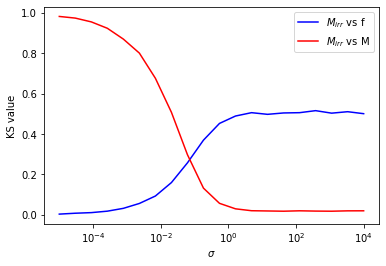

In [69]:
#.4 K-S distance between M_irr and f & .5 K-S distance between M_irr and M
ks_1 = []   #M_irr vs f
ks_2 = []   #M_irr vs M

#Using the equivalent of a linspace but for logarithm exponents
sigmas = np.logspace(-5, 4, 20)

for i in sigmas:
    ks_mass = stats.norm(loc=mu, scale=i).rvs(N)
    ks_Mirr = ks_mass * f(spin)

    #Perform the KS test and save it
    ks_1.append(stats.ks_2samp(ks_Mirr, f(spin)))
    ks_2.append(stats.ks_2samp(ks_Mirr, ks_mass))

ks_1 = np.array(ks_1)
ks_2 = np.array(ks_2)

plt.plot(sigmas, ks_1[:, 0], label= r'$M_{irr}$ vs f', c='blue')
plt.plot(sigmas, ks_2[:, 0], label= r'$M_{irr}$ vs M', c='red')
plt.xlabel(r'$\sigma$')
plt.ylabel('KS value')
plt.semilogx()
plt.legend()
plt.show()

[//]: <> (.6 Asymptotical trends for irreducible mass)
### Qualitative analysis
For small $\sigma$, the KS distance between $M_{irr}$ and f (blue line) goes to zero, this means that the distribution of $M_{irr}$ goes as f.

On the other hand, for large $\sigma$, the KS distance between $M_{irr}$ and M (red line) goes to zero, this means that the distribution of $M_{irr}$ goes as M